# Function Approximation with ReLU Activation
*Note: This project is still a work in progress. 

In this notebook, we aim to model a two layer neural network using ReLu Activaiton ($\sigma(x) = max\{0,x\}$) to approximate a defined function g(x) with arbitrary precision. This network performs linear interpolation of the defined function.

One can vary the value of epsilon, as well as redefine the function g(x). 
We estimate $\sup_{x\in[0,1]}|f(x)-g(x)|$ by finding the max difference on the interval. In this sense, we want to show that this difference is always less than epsilon. Note that this corresponds to a positive result in our final cell. 

## Proposition Statement
Let $g: [0,1] \rightarrow \mathbb{R}$ be a continuous function. Then the neural network $f_n=\sum_{i=0}^{n}na_iReLU(-x+\frac{i+1}{n})$ converges uniformly to g(x). We define $a_i$ in the following way:
$
\begin{bmatrix}
a_0\\
a_1\\
a_2\\
...\\
a_n
\end{bmatrix}
$
=
$
\begin{bmatrix}
1 & -2 & 1 & 0 & ... & 0\\
0 & 1 & -2 & 1 & ... & 0\\
0 & 0 & 1 & -2 & ... & 0\\
... &... &... & ... & ... & ...\\
0 & 0 & 0 & 0 & ... & 1
\end{bmatrix}
$
$
\begin{bmatrix}
g(0)\\
g(\frac{1}{n})\\
g(\frac{2}{n})\\
...\\
g(1)
\end{bmatrix}
$

$proof.$ Since g(x) is continuous on a compact set, it is uniformly continuous. Then, $\forall \epsilon > 0, \exists  \delta > 0$ such that $\forall x,y \in [0,1]$ with $|x-y|<\delta, |g(x)-g(y)|<\epsilon$. Choose N = $\lceil \frac{1}{\delta} \rceil$ Then $\forall n \in \mathbb{N}$ with n$\geq$N, we have the following:
$
\begin{align}
|f_n(x)-g(x)| &= |g(\frac{k}{n})(k+1-nx) - g(\frac{k+1}{n})(k-nx) - g(x)|\\
&= |g(\frac{k}{n}) - g(x) + (k-nx)(g(\frac{k}{n})-g(\frac{k+1}{n}))|\\
&\leq |g(\frac{k}{n}) - g(x)| + |(k-nx)(g(\frac{k}{n})-g(\frac{k+1}{n}))|\\
&< |g(\frac{k}{n}) - g(x)| + |(g(\frac{k}{n})-g(\frac{k+1}{n}))|\\
&< \frac{\epsilon}{2} + \frac{\epsilon}{2} = \epsilon \\
\end{align}
$
$\\$
We conclude that $f_n$ converges uniformly to g.



In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [15]:
epsilon = .5 #Chosen with a large value for visualization purposes
#Thsese two parameters were chosen based on previous experiment with heaviside activation, but may not be fully accurate here.
delta = epsilon/2
M = int(np.ceil(1/delta))

In [16]:
#Arbitrarily Chosen
#Theory states that this program will work for any continuous function on [0,1]
def g(x):
    return x**2

In [17]:
#Vector of node biases
b = np.linspace(0,1,M)

#Calculation of weights a_i
diagonals = [[1]*M,[-2]*(M-1),[1]*(M-2)]
A = scipy.sparse.diags(diagonals,[0,1,2])

a = A@g(b)
b1 = b +b[1]

In [18]:

def relu(x):
    return max(0,x)

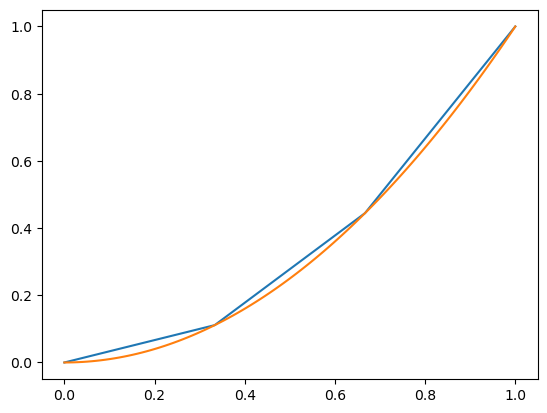

In [19]:
#There's likely a more efficient way to do this part. This is what I came up with. 
def f(x,a,b):
    h=np.zeros((len(x),M))
    for j in range(len(b)):
        for i, num in enumerate(x):
            h[i][j] = (M-1)*relu(b[j]-num)
  
    return (h@a)
    
#Define x vector
x = np.linspace(0,1,100)
#visualize
plt.plot(x,f(x,a,b1), x, g(x)) 

In [20]:
error = max(abs(f(x,a,b1)-g(x)))

In [21]:
print(epsilon - error)

0.47224772982348723


## Generalizing to interval [a,b]

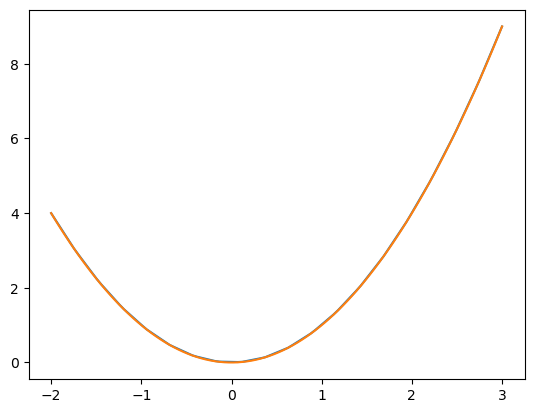

In [22]:
a0 = -2
b0 = 3
M = M*(b0-a0)
b2 = np.linspace(a0,b0,M)
diagonals = [[1]*M,[-2]*(M-1),[1]*(M-2)]
A = scipy.sparse.diags(diagonals,[0,1,2])
b = np.linspace(0,1,M)
a = A@g(b2)
b1 = b + b[1]

def f1(x,a,b):
    h=np.zeros((len(x),M))
    for j in range(len(b)):
        for i, num in enumerate(x):
            h[i][j] = (M-1)*relu((a0-num)/(b0-a0)+b[j])
  
    return (h@a)
    
#Define x vector
x = np.linspace(a0,b0,100)
#visualize
plt.plot(x,f1(x,a,b1), x, g(x)) 